# plotter code
This code is for plotting trajectories of different agents, and some analysis

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob
import os
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
import matplotlib.patheffects as path_effects
overallpath="C:/Users/dexte/Documents/GitHub/ant_trajectory/"
datapath="success_plots_csvs/"
csv_files=[]


In [84]:
filepath = overallpath+datapath
csv_files = glob.glob(os.path.join(filepath, "*.csv"))
dataset=[]
print(len(csv_files))
for file in csv_files:
    print(file)
    if "training" not in file:
        p=pd.read_csv(file)
        p=p[['body_x_cm', 'body_y_cm','food_rel_x_cm',
       'food_rel_y_cm','time']]
        dataset.append(p)

23
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_testA_ant1.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_testB_ant2.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_testB_ant3.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_training_ant1.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_training_ant2.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-05_training_ant3.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-11_test_ant1.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-19_test_antA.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-19_test_antB.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-07-19_test_antC.csv
C:/Users/dexte/Documents/GitHub/ant_trajectory/success_plots_csvs\2023-0

Index(['Unnamed: 0', 'frame_number', 'body_x', 'body_y', 'body_prob', 'time',
       'headings', 'in_arena', 'body_x_cm', 'body_y_cm', 'rel_x', 'rel_y',
       'rel_x_cm', 'rel_y_cm', 'food_rel_x', 'food_rel_y', 'food_rel_x_cm',
       'food_rel_y_cm', 'dist_to_food_cm'],
      dtype='object')


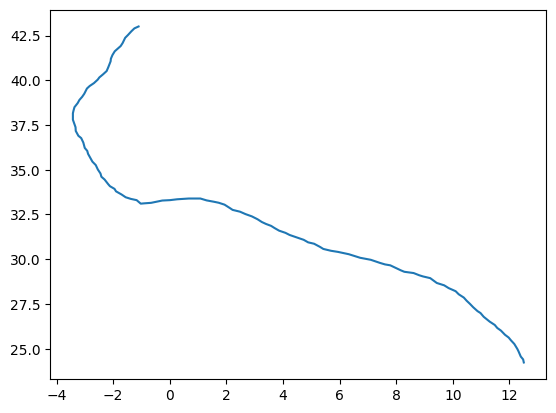

In [23]:
print(dataset[0].keys())
example=dataset[5]
plt.plot(example['rel_x_cm'],example['rel_y_cm'])
#plt.plot(example['food_rel_x_cm'],example['food_rel_y_cm'])
plt.show()

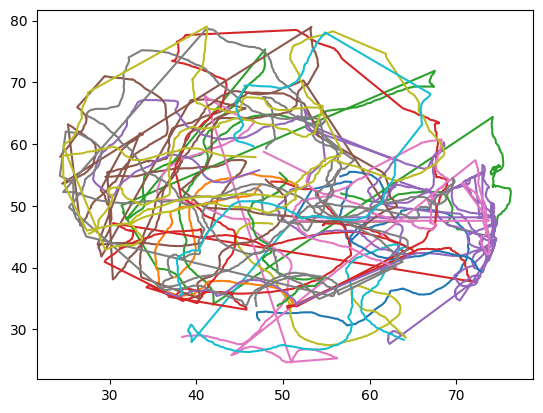

In [98]:
for example in dataset:
    plt.plot(example['body_x_cm'],example['body_y_cm'])
    #plt.plot(example['food_rel_x_cm'],example['food_rel_y_cm'])
plt.show()

## heatmap of paths

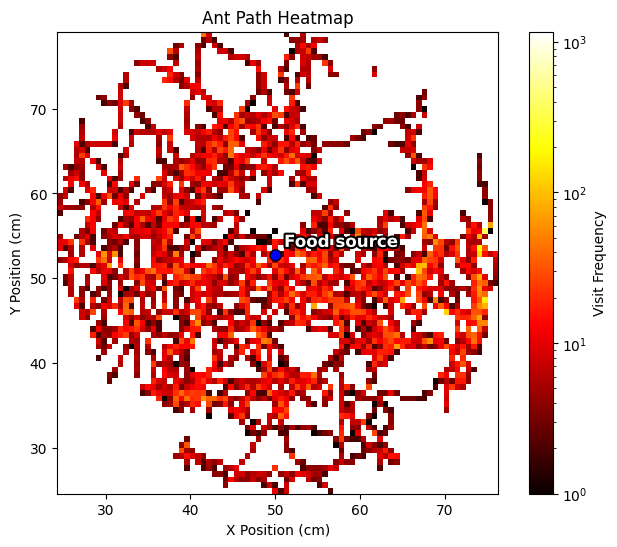

In [96]:
all_x = []
all_y = []
initial_points=[]
for example in dataset:
    all_x.extend(example['body_x_cm'])
    all_y.extend(example['body_y_cm'])
    dx = example['body_x_cm'].iloc[0] - example['food_rel_x_cm'].iloc[0]
    dy = example['body_y_cm'].iloc[0] - example['food_rel_y_cm'].iloc[0]
    initial_points.append([dx, dy])
    #plt.scatter(example['body_x_cm'][0]-example['food_rel_x_cm'][0],example['body_y_cm'][0]-example['food_rel_y_cm'][0])

initial_points=np.array(initial_points)
initial_points=np.average(initial_points,axis=0)
heatmap, xedges, yedges = np.histogram2d(all_x, all_y, bins=80)

#plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(
    heatmap.T, origin='lower',
    extent=[min(all_x), max(all_x), min(all_y), max(all_y)],
    cmap='hot', interpolation='nearest',
    norm=LogNorm(vmin=1, vmax=heatmap.max())
)

plt.colorbar(label='Visit Frequency')
b=plt.scatter(initial_points[0],initial_points[1],c="b")
text = plt.text(initial_points[0]+1,initial_points[1]+1, "Food source", fontsize=12, color='white', weight='bold')
text.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground='black'),
    path_effects.Normal()
])
b.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground='black'),
    path_effects.Normal()
])
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('Ant Path Heatmap')
plt.show()

### lets do some vectors too

In [54]:

def resample_trajectory(x, y, num_points=50):
    """Resample trajectory to have exactly `num_points` using linear interpolation."""
    t = np.linspace(0, 1, len(x))
    fx = interp1d(t, x)
    fy = interp1d(t, y)
    t_new = np.linspace(0, 1, num_points)
    return fx(t_new), fy(t_new)

all_trajs = []
valid_trajs = []

for example in dataset:
    x = example['body_x_cm']
    y = example['body_y_cm']
    if len(x) < 10:  
        continue
    x_resampled, y_resampled = resample_trajectory(x, y, num_points=50)
    traj = np.vstack([x_resampled, y_resampled]).T.flatten()  
    all_trajs.append(traj)
    valid_trajs.append((x_resampled, y_resampled))


c:\Users\dexte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dexte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


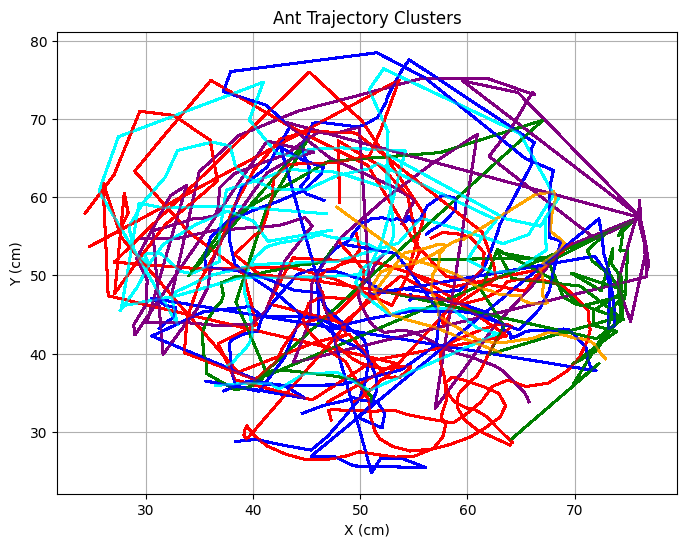

In [57]:
k = 100 #sample based on 
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(all_trajs)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
plt.figure(figsize=(8, 6))
for (x, y), label in zip(valid_trajs, labels):
    plt.plot(x, y, alpha=0.3, color=colors[label % len(colors)])
plt.title("Ant Trajectory Clusters")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
plt.grid(True)
plt.show()